In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.getcwd()
#this is the dataset location which is shown in video
'''
os.chdir('/content/drive/My Drive/deep learning')
'''
#now you have to use below one as you already created Data folder shortcut in My Drive
os.chdir('/content/drive/My Drive/Apple Pred')

In [4]:
apple_training_complete = pd.read_csv('apple_training.csv')  

In [5]:
apple_training_complete.shape

(1260, 7)

In [6]:
print(apple_training_complete)

            Date        Open        High         Low       Close   Adj Close  \
0     2012-12-31   72.932854   76.485718   72.714287   76.024284   53.974899   
1     2013-01-02   79.117142   79.285713   77.375717   78.432854   55.684914   
2     2013-01-03   78.268570   78.524284   77.285713   77.442856   54.982059   
3     2013-01-04   76.709999   76.947144   75.118568   75.285713   53.450539   
4     2013-01-07   74.571426   75.614288   73.599998   74.842857   53.136124   
...          ...         ...         ...         ...         ...         ...   
1255  2017-12-22  174.679993  175.419998  174.500000  175.009995  171.685074   
1256  2017-12-26  170.800003  171.470001  169.679993  170.570007  167.329453   
1257  2017-12-27  170.100006  170.779999  169.710007  170.600006  167.358871   
1258  2017-12-28  171.000000  171.850006  170.479996  171.080002  167.829758   
1259  2017-12-29  170.520004  170.589996  169.220001  169.229996  166.014908   

         Volume  
0     164873100  
1  

In [7]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values  


In [8]:
apple_training_processed.shape

(1260, 1)

In [9]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)  

In [10]:
apple_training_scaled.shape

(1260, 1)

In [11]:
apple_training_processed #data before scaling

array([[ 72.932854],
       [ 79.117142],
       [ 78.26857 ],
       ...,
       [170.100006],
       [171.      ],
       [170.520004]])

In [12]:
apple_training_scaled


array([[0.14628787],
       [0.19795893],
       [0.19086893],
       ...,
       [0.95814041],
       [0.96566005],
       [0.96164958]])

In [13]:
features_set = []  
labels = []  
for i in range(60, 1260):  
    features_set.append(apple_training_scaled[i-60:i,0])
    labels.append(apple_training_scaled[i, 0])

In [14]:
len(features_set)

1200

In [15]:
features_set, labels = np.array(features_set), np.array(labels)  


In [16]:
features_set.shape

(1200, 60)

In [17]:
labels.shape

(1200,)

In [18]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))  


In [19]:
features_set.shape

(1200, 60, 1)

In [20]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout

In [21]:
model = Sequential()

In [22]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))  


In [23]:
model.add(Dropout(0.2))  


In [24]:
model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))  

In [25]:
model.add(Dense(units = 1))  


In [26]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  


In [51]:
model.fit(features_set, labels, epochs = 150, batch_size = 32)  


Epoch 1/150
38/38 [==============================] - 9s 240ms/step - loss: 8.3805e-04
Epoch 2/150
38/38 [==============================] - 7s 167ms/step - loss: 7.5787e-04
Epoch 3/150
38/38 [==============================] - 4s 116ms/step - loss: 8.3456e-04
Epoch 4/150
38/38 [==============================] - 4s 116ms/step - loss: 7.4123e-04
Epoch 5/150
38/38 [==============================] - 4s 116ms/step - loss: 8.4860e-04
Epoch 6/150
38/38 [==============================] - 5s 135ms/step - loss: 7.8237e-04
Epoch 7/150
38/38 [==============================] - 8s 204ms/step - loss: 7.4676e-04
Epoch 8/150
38/38 [==============================] - 4s 117ms/step - loss: 7.9537e-04
Epoch 9/150
38/38 [==============================] - 4s 116ms/step - loss: 8.1726e-04
Epoch 10/150
38/38 [==============================] - 4s 116ms/step - loss: 8.8261e-04
Epoch 11/150
38/38 [==============================] - 4s 117ms/step - loss: 8.6853e-04
Epoch 12/150
38/38 [==============================] 

# Testing the LSTM

In [28]:
apple_testing_complete = pd.read_csv('apple_testing.csv')  
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values  

In [29]:
apple_testing_processed.shape

(20, 1)

In [30]:
apple_testing_complete.shape

(20, 7)

Converting test data into right format
For each day of January 2018, we want our feature set to contain the opening stock prices for the previous 60 days. For the 1st of January, we need the stock prices for the previous 60 days. To do so, we need to concatenate our training data and test data before preprocessing

In [31]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)


In [32]:
apple_total.shape

(1280,)

Now let's prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days. That means we need opening stock prices for the 20 test days for the month of January 2018 and the 60 stock prices from the last 60 days for the training set.

In [52]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values 

In [34]:
test_inputs.shape

(80,)

Scale our test data as we did in train data

In [35]:
test_inputs = test_inputs.reshape(-1,1) 

In [36]:
test_inputs.shape

(80, 1)

In [37]:
 
test_inputs = scaler.transform(test_inputs)  

In [38]:
test_inputs[0]

array([0.82512526])

In [39]:
test_features = []  
for i in range(60, 80):  
    test_features.append(test_inputs[i-60:i, 0])


In [40]:
test_features = np.array(test_features) 

In [41]:
test_features.shape

(20, 60)

In [42]:
 
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))  

In [43]:
test_features.shape

(20, 60, 1)

In [44]:
predictions = model.predict(test_features)  

1/1 [==============================] - 2s 2s/step


In [45]:
predictions

array([[0.94594395],
       [0.9453595 ],
       [0.9498715 ],
       [0.95645136],
       [0.96304935],
       [0.9689297 ],
       [0.97304505],
       [0.9725678 ],
       [0.9716107 ],
       [0.97448   ],
       [0.982702  ],
       [0.98901457],
       [0.9966158 ],
       [1.0025624 ],
       [1.0032754 ],
       [1.000427  ],
       [0.99695957],
       [0.9902343 ],
       [0.9787695 ],
       [0.9643789 ]], dtype=float32)

Since we scaled our data, the predictions made by the LSTM are also scaled. We need to reverse the scaled prediction back to their actual values. To do so, we can use the ìnverse_transform method of the scaler object we created during training.

In [46]:
predictions = scaler.inverse_transform(predictions)

In [47]:
predictions

array([[168.64026],
       [168.57031],
       [169.11034],
       [169.89786],
       [170.68755],
       [171.39133],
       [171.88388],
       [171.82675],
       [171.71222],
       [172.05562],
       [173.03967],
       [173.7952 ],
       [174.70497],
       [175.41667],
       [175.50201],
       [175.1611 ],
       [174.7461 ],
       [173.9412 ],
       [172.56902],
       [170.84666]], dtype=float32)

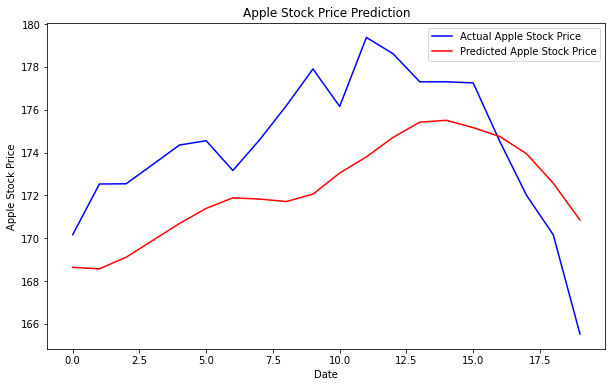

In [48]:
plt.figure(figsize=(10,6))  
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')  
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')  
plt.title('Apple Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Apple Stock Price')  
plt.legend()  
plt.show()  

Conclusion
A long short-term memory network (LSTM) is one of the most commonly used neural networks for time series analysis. The ability of LSTM to remember previous information makes it ideal for such tasks. In this article, we saw how we can use LSTM for the Apple stock price prediction.